#Guía genérica: **Naive Bayes**
**Profesor: Christian Alvarez Carreño**

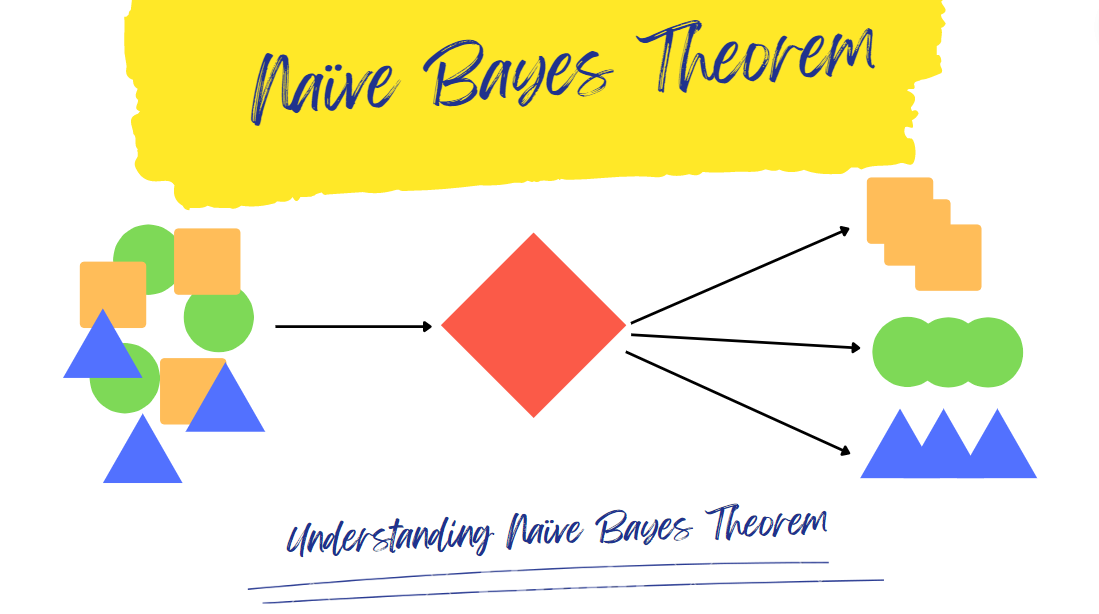

In [ ]:
#Setup
import pandas as pd
import numpy as np
import seaborn as sns
import warnings as wr
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

wr.filterwarnings('ignore')

A continuación debe seleccionar si quiere usar Gaussian, Multinomial o Bernoulli.

##**Gaussian Naive Bayes:**
Utilizado cuando las características son continuas y se asume que siguen una distribución normal.

###Captura de los Datos

In [ ]:
#Acá puede capturar cualquier dataframe
df = pd.DataFrame({
    'Columna 1': [25, 30, 35, 28, 22],
    'Columna 2': [5, 7, 10, 6, 3],
    'Feature': [0, 0, 1, 1, 0]
})

print(df)

   Columna 1  Columna 2  Feature
0         25          5        0
1         30          7        0
2         35         10        1
3         28          6        1
4         22          3        0


###Matriz de correlaciones

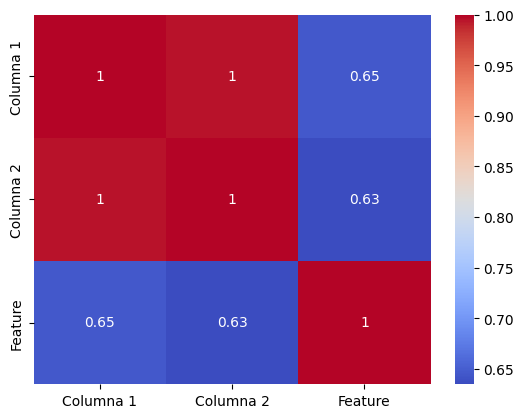

In [ ]:
# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Crea un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

###Variable dependiente y variables independientes

In [ ]:
# Preparación de los datos
X = df[['Columna 1', 'Columna 2']]
y = df['Feature']

###Entrenamiento Modelo y Accuracy

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Modelo Naive Bayes Gausiano
model = GaussianNB().fit(X, y)

#Predicciones
y_pred = model.predict(X)

#Accuracy de la comparación
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.60


###***Train y Test Split***

***Opcional: Ejecutar esta celda sólo si se desea particionar la data entre entrenamiento y test***

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Modelo Naive Bayes Gausiano
model = GaussianNB().fit(X_train, y_train)

#Predicciones
y_pred = model.predict(X_test)

#Accuracy de la comparación
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.00


###Predicciones con registros nuevos

In [ ]:
# Predicción
new_data = [[25, 5]]
print(model.predict(new_data)[0])

#Probabilidades por clase
print(model.predict_proba(new_data)[0])

0
[0.97057862 0.02942138]


##**Multinomial Naive Bayes**
Adecuado para datos discretos como la frecuencia de palabras en textos, comúnmente usado en clasificación de textos.

###Captura de los Datos

In [ ]:
!pip install --upgrade datasets
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer

from datasets import load_dataset

# Cargamos el dataset
dataset = load_dataset("imdb", split='train[:10%]')

# Preprocesamos los datos
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(dataset['text'])
y = dataset['label']


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [ ]:
# Instalación de las librerías necesarias
!pip install datasets scikit-learn

from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar el dataset de IMDb
dataset = load_dataset("imdb", split='train')

# Preprocesamos los datos
vectorizer = CountVectorizer(stop_words='english', max_features=1000)

# Vectorizamos las reseñas
X = vectorizer.fit_transform(dataset['text'])
y = dataset['label']

# Dividir los datos en conjunto de entrenamiento y validación
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamos un modelo de Naive Bayes Multinomial
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluamos el modelo
y_pred = model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Ahora, vectorizamos la frase "this film is bad"
phrase = ["this film is bad"]
phrase_vectorized = vectorizer.transform(phrase)

# Predecimos la probabilidad de que sea positiva
positive_probability = model.predict_proba(phrase_vectorized)[0][1]
print(f'La probabilidad de que la frase "this film is bad" sea positiva es: {positive_probability:.4f}')


Accuracy: 0.8198
La probabilidad de que la frase "this film is bad" sea positiva es: 0.2283


In [ ]:
#Acá puede capturar cualquier dataframe
df = pd.DataFrame({
    'Text': ['free money', 'free pizza', 'free drinks', 'paid lunch', 'paid vacation', 'paid breakfast'],
    'Feature': [1, 1, 1, 0, 0, 0]
})

print(df)

             Text  Feature
0      free money        1
1      free pizza        1
2     free drinks        1
3      paid lunch        0
4   paid vacation        0
5  paid breakfast        0


###Vectorización

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorización de la variable independiente
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Text'])

#Variable dependiente
y = df['Feature']

#Número de palabras únicas identificadas
print(len(vectorizer.get_feature_names_out()))

#Número de veces que aparece la palabra "free" en los datos
print(X.toarray()[:, vectorizer.get_feature_names_out().tolist().index('free')].sum())

8
3


###Entrenamiento Modelo y Accuracy

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Modelo Naive Bayes
model = MultinomialNB()
model.fit(X, y)

#Predicciones
y_pred = model.predict(X)

#Accuracy de la comparación
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


###***Train y Test Split***

***Opcional: Ejecutar esta celda sólo si se desea particionar la data entre entrenamiento y test***

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Modelo Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

#Predicciones
y_pred = model.predict(X_test)

#Accuracy de la comparación
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


###Predicciones con registros nuevos

In [ ]:
text = vectorizer.transform(['paid money'])
prediction = model.predict(text)
print(prediction)

#Probabilidades por clase
print(model.predict_proba(text)[0])

[0]
[0.66666667 0.33333333]


##**Bernoulli Naive Bayes**
Utilizado para variables booleanas (verdadero/falso) y es típicamente empleado en filtros de spam donde las **características son binarias**.

###Captura de los Datos

In [ ]:
from datasets import load_dataset

# Cargar el dataset
dataset = load_dataset("tweets_hate_speech_detection")

# Preprocesar los datos
texts = dataset['train']['tweet'] # Usamos solo el conjunto de entrenamiento para simplificar
labels = dataset['train']['label']

README.md:   0%|          | 0.00/5.58k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.07M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.11M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/31962 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/17197 [00:00<?, ? examples/s]

In [ ]:
# Instalación de las librerías necesarias
!pip install datasets scikit-learn

from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# Cargar el dataset
dataset = load_dataset("tweets_hate_speech_detection")

# Preprocesar los datos
texts = dataset['train']['tweet']  # Usamos solo el conjunto de entrenamiento para simplificar
labels = dataset['train']['label']

# Paso 1: ¿Cuántas palabras únicas se identifican en el conjunto de entrenamiento?
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)

# Número de palabras únicas
unique_words = len(vectorizer.get_feature_names_out())
print(f'Número de palabras únicas en el conjunto de entrenamiento: {unique_words}')

# Paso 2: Entrenamos el modelo con todos los datos y calculamos el accuracy
model = BernoulliNB()
model.fit(X, labels)

# Hacemos predicciones en el conjunto de entrenamiento
y_pred = model.predict(X)

# Calculamos el accuracy
accuracy = accuracy_score(labels, y_pred)
print(f'Accuracy en el conjunto de entrenamiento: {accuracy * 100:.2f}%')

# Paso 3: Determinamos si el siguiente tweet es de odio
tweet = ['@user #sikh #temple vandalised in in #calgary, #wso condemns act']

# Vectorizamos el tweet
tweet_vectorized = vectorizer.transform(tweet)

# Predicción de si el tweet es de odio
probability = model.predict_proba(tweet_vectorized)[0][1]  # Probabilidad de que sea de odio

# Imprimimos la respuesta para la tercera pregunta
print(f'Probabilidad de que el tweet sea de odio: {probability:.2f}')
if probability > 0.5:
    print("El tweet es de odio.")
else:
    print("El tweet no es de odio.")


Número de palabras únicas en el conjunto de entrenamiento: 41104
Accuracy en el conjunto de entrenamiento: 95.38%
Probabilidad de que el tweet sea de odio: 1.00
El tweet es de odio.


In [ ]:
#Acá puede capturar cualquier dataframe
df = pd.DataFrame({
    'Text': ['free money', 'free pizza', 'free drinks', 'paid lunch', 'paid vacation', 'paid breakfast'],
    'Feature': [1, 1, 1, 0, 0, 0]
})

print(df)

             Text  Feature
0      free money        1
1      free pizza        1
2     free drinks        1
3      paid lunch        0
4   paid vacation        0
5  paid breakfast        0


###Vectorización binaria

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorización de la variable independiente en forma binaria
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(df['Text'])

#Variable dependiente
y = df['Feature']

#Número de palabras únicas identificadas
print(len(vectorizer.get_feature_names_out()))

#Número de veces que aparece la palabra "free" en los datos
print(X.toarray()[:, vectorizer.get_feature_names_out().tolist().index('free')].sum())

8
3


###Entrenamiento Modelo y Accuracy

In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Modelo Naive Bayes
model = BernoulliNB()
model.fit(X, y)

#Predicciones
y_pred = model.predict(X)

#Accuracy de la comparación
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


###***Train y Test Split***

***Opcional: Ejecutar esta celda sólo si se desea particionar la data entre entrenamiento y test***

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Modelo Naive Bayes
model = BernoulliNB()
model.fit(X_train, y_train)

#Predicciones
y_pred = model.predict(X_test)

#Accuracy de la comparación
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


###Predicciones con registros nuevos

In [ ]:
text = vectorizer.transform(['free money'])
prediction = model.predict(text)
print(prediction)

#Probabilidades por clase
print(model.predict_proba(text)[0])

[1]
[0.11111111 0.88888889]


# Parte 2: Nuevos Insights predictivos para tu set de Datos

Usando el dataset del Taller N°1 y/o codificado del Taller N°2, deberá realizar un modelo de Naive Bayes  que permita realizar predicciones para nuevos datos, de manera que pueda encontrar nuevos insights que sirvan como contribución en su próxima publicación.

In [ ]:
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
from seaborn import load_dataset

# Enlace de descarga directa
file_id = '1tiQu76UvVDMziFp6WpfxFcr5kgKBVxOW'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Leer el archivo CSV con punto y coma como separador
df_original = pd.read_csv(download_url, sep=';')

# Crear una copia del DataFrame original para trabajar sobre ella
df = df_original.copy()

# Mostrar 10 filas aleatorias
df.sample(10)

Country  Year     Food Category  Total Waste (Tons)  \
1376         China  2023    Meat & Seafood            19338.41   
936         Russia  2021      Bakery Items             9245.76   
3103        Mexico  2022     Prepared Food            15312.77   
2570         Italy  2023         Beverages            44859.73   
3961  Saudi Arabia  2018         Beverages            17771.61   
1158           USA  2024     Prepared Food            28293.20   
1761        Canada  2021     Prepared Food            43527.28   
3140  South Africa  2018  Grains & Cereals            18565.85   
2300       Germany  2023     Prepared Food            13477.56   
2982        France  2023     Prepared Food             8866.77   

      Economic Loss (Million $)  Avg Waste per Capita (Kg)  \
1376                   20365.97                     190.10   
936                    10467.85                     158.44   
3103                   13090.17                      28.72   
2570                   53743.68                     126.17   
3961                   17461.07                      56.81   
1158                   27917.29                     136.94   
1761                   49663.05                      65.95   
3140                   16172.53                      45.13   
2300                   14833.40                     132.43   
2982                    9231.98                      29.46   

      Population (Million)  Household Waste (%)  
1376                424.67                31.52  
936                  60.52                46.22  
3103                992.86                49.73  
2570                611.76                34.67  
3961                831.42                62.27  
1158               1276.82                57.11  
1761                682.47                45.78  
3140                335.33                44.72  
2300                719.60                31.27  
2982                138.08                61.23

**Pregunta 16**

Indique la variable objetivo y las variables predictoras que usará para construir un modelo Naive Bayes.

In [ ]:
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
from seaborn import load_dataset

# Enlace de descarga directa
file_id = '1tiQu76UvVDMziFp6WpfxFcr5kgKBVxOW'
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Leer el archivo CSV con punto y coma como separador
df_original = pd.read_csv(download_url, sep=';')

# Crear una copia del DataFrame original para trabajar sobre ella
df = df_original.copy()

# Mostrar 10 filas aleatorias
df.sample(10)

Country  Year        Food Category  Total Waste (Tons)  \
3619        Mexico  2019       Meat & Seafood            26504.56   
4808        Turkey  2022       Meat & Seafood              667.04   
4865         Spain  2018     Grains & Cereals            26032.71   
4988  Saudi Arabia  2019  Fruits & Vegetables            44319.58   
2931   South Korea  2021          Frozen Food            22320.32   
2329        Mexico  2024       Dairy Products            40124.91   
1446        Brazil  2019     Grains & Cereals            17126.74   
1383         India  2023            Beverages             1634.45   
908          Japan  2021          Frozen Food            48272.56   
1379         Italy  2020     Grains & Cereals            23225.05   

      Economic Loss (Million $)  Avg Waste per Capita (Kg)  \
3619                   24413.89                      76.83   
4808                     723.18                     116.05   
4865                   27914.26                      59.22   
4988                   37349.47                     113.72   
2931                   20365.11                      55.19   
2329                   33316.74                     111.39   
1446                   17098.43                      40.51   
1383                    1960.97                      71.68   
908                    45655.35                     146.66   
1379                   26503.44                      52.02   

      Population (Million)  Household Waste (%)  
3619                785.48                58.78  
4808                855.07                38.86  
4865                 91.28                63.83  
4988               1378.23                61.61  
2931               1067.05                52.08  
2329                917.67                56.47  
1446               1331.19                61.84  
1383                 23.17                54.52  
908                 236.12                65.57  
1379                493.99                46.13

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# 1. Estandarizar nombres de columnas (evita errores por espacios)
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "").str.replace("-", "_")

# 2. Verifica cómo quedaron los nombres
# print(df.columns.tolist())

# 3. Definir variables predictoras y objetivo
features = [
    'Country',
    'Year',
    'Total_Waste_Tons',
    'Avg_Waste_per_Capita_Kg',
    'Population_Million',
]

target = 'Food_Category'

# 4. Filtrar las columnas necesarias
df_model = df[features + [target]].copy()

# 5. Codificar columnas categóricas (Country y Food_Category)
label_encoders = {}
for col in df_model.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# 6. Separar X e y
X = df_model[features]
y = df_model[target]

# 7. Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 8. Entrenar modelo Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# 9. Predecir y evaluar el modelo
y_pred = model.predict(X_test)

# 10. Mostrar resultados
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.12666666666666668
              precision    recall  f1-score   support

           0       0.18      0.04      0.06       202
           1       0.12      0.33      0.18       176
           2       0.00      0.00      0.00       197
           3       0.12      0.07      0.08       182
           4       0.17      0.02      0.04       188
           5       0.00      0.00      0.00       172
           6       0.08      0.01      0.01       173
           7       0.13      0.51      0.20       210

    accuracy                           0.13      1500
   macro avg       0.10      0.12      0.07      1500
weighted avg       0.10      0.13      0.07      1500



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Pregunta 17**

Basándonos en las aplicaciones de Naive Bayes aprendidas en este taller, escriba al menos 3 nuevos insights para el set de datos que ha ido trabajando en los talleres anteriores.


1. Algunas categorías de alimentos presentan patrones de desperdicio más identificables que otras.
La clase 7 alcanzó un recall de 0.51, lo que indica que el modelo logró reconocer más de la mitad de los casos reales para esa categoría. Esto sugiere que esta clase posee características particulares que la hacen más fácil de predecir a partir de variables como el país, el año y los niveles de residuos.

2. Las variables numéricas no permiten diferenciar con claridad todas las categorías.
La baja precisión y recall en la mayoría de las clases (algunas con valores cercanos a cero) indican que las variables continuas como “Total Waste” o “Economic Loss” no bastan por sí solas para distinguir entre las distintas categorías de alimentos. Es probable que se requieran variables adicionales, más específicas del producto o de su cadena de distribución.

3. El país y el año podrían influir en los patrones de desperdicio alimentario, aunque no de forma suficiente.
Pese a que el modelo incluye Country y Year como predictores, el bajo desempeño general sugiere que estas variables por sí solas no logran capturar las complejidades del fenómeno. Sin embargo, su inclusión permitió al modelo identificar parcialmente ciertas clases, lo cual indica que estos factores tienen cierta relevancia contextual que podría potenciarse si se combinan con otras variables cualitativas.